In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"D:\Downloads\Churn_Modelling.csv")
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9348,9349,15807239,Lung,664,France,Female,34,7,93920.47,1,0,0,179913.98,0
2785,2786,15771417,Thomas,640,France,Male,43,7,132412.38,1,0,0,69584.30,1
6896,6897,15649086,Patterson,596,France,Male,42,7,0.00,2,1,1,121568.37,0
7222,7223,15694237,McEwan,744,Spain,Male,39,4,95161.75,1,1,0,19409.77,0
8653,8654,15650454,Tran,641,France,Male,57,5,0.00,2,1,1,122449.18,0


In [3]:
df.drop(['RowNumber','CustomerId','Surname'],axis='columns',inplace=True)


In [4]:
df.CreditScore.dtypes

dtype('int64')

In [5]:
df.isnull()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
cols=['Geography','Gender']
df2=pd.get_dummies(data=df,columns=cols)
df2.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [8]:
cols_scale=['CreditScore','Age','Tenure','Balance','EstimatedSalary']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

df2[cols_scale]=scaler.fit_transform(df2[cols_scale])


In [9]:
df2.NumOfProducts.unique()

array([1, 3, 2, 4], dtype=int64)

In [10]:
df2.sample(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
7272,0.606,0.756757,0.0,0.483369,1,1,1,0.801760,0,1,0,0,1,0
6417,0.880,0.256757,0.6,0.000000,2,1,1,0.597419,0,0,0,1,0,1
2425,0.668,0.283784,0.4,0.556895,1,1,1,0.603060,0,0,0,1,1,0
7,0.052,0.148649,0.4,0.458540,4,1,0,0.596733,1,0,1,0,1,0
6934,0.400,0.283784,0.2,0.462818,2,1,1,0.978226,0,0,0,1,0,1


In [11]:
x=df2.drop('Exited',axis='columns')
y=df2['Exited']
y


0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [13]:
y_train.shape

(8000,)

In [14]:
X_train.shape

(8000, 13)

In [15]:
model=keras.Sequential([keras.layers.Dense(100,input_shape=(13,),activation='relu'),keras.layers.Dense(50,activation='relu'),keras.layers.Dense(10,activation='relu'),keras.layers.Dense(1,activation='sigmoid')])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(X_train,y_train,epochs=100)

Epoch 1/100
250/250 [==============================] - 2s 2ms/step - loss: 0.4731 - accuracy: 0.7966
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4093 - accuracy: 0.8179
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3776 - accuracy: 0.8380
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3630 - accuracy: 0.8465
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3555 - accuracy: 0.8534
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3488 - accuracy: 0.8575
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3459 - accuracy: 0.8579
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3426 - accuracy: 0.8616
Epoch 9/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3390 - accuracy: 0.8610
Epoch 10/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3408 - accura

In [16]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.4023 - accuracy: 0.8535


[0.4023378789424896, 0.8535000085830688]

In [17]:
yp=model.predict(X_test)
yp

63/63 [==============================] - 0s 1ms/step


array([[0.00282961],
       [0.00516005],
       [0.00425675],
       ...,
       [0.01981514],
       [0.01600466],
       [0.00110868]], dtype=float32)

In [18]:
y_pred=[]
count=0
for i in yp:
    if i>0.5:
        y_pred.append(1)
        count+=1
    else:
        y_pred.append(0)
count


278

In [19]:
y_test[:10]

9957    0
1687    0
2116    0
231     0
2780    0
4578    0
8260    0
8557    0
9523    0
802     0
Name: Exited, dtype: int64

In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1623
           1       0.65      0.48      0.55       377

    accuracy                           0.85      2000
   macro avg       0.77      0.71      0.73      2000
weighted avg       0.84      0.85      0.84      2000



Text(95.72222222222221, 0.5, 'Truth')

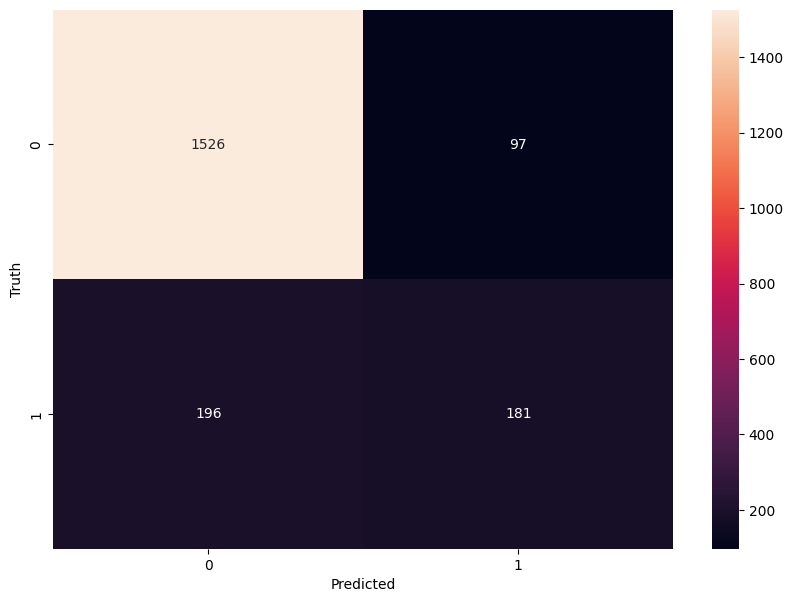

In [21]:
import seaborn as sn
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [22]:
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [23]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')

x_sm,y_sm=smote.fit_resample(x,y)

y_sm.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [25]:
X_train,X_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=0.2,random_state=15,stratify=y_sm)
y_train.value_counts()

0    6370
1    6370
Name: Exited, dtype: int64

In [26]:
model=keras.Sequential([keras.layers.Dense(100,input_shape=(13,),activation='relu'),keras.layers.Dense(50,activation='relu'),keras.layers.Dense(10,activation='relu'),keras.layers.Dense(1,activation='sigmoid')])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(x_sm,y_sm,epochs=100)

Epoch 1/100
498/498 [==============================] - 3s 3ms/step - loss: 0.5643 - accuracy: 0.7084
Epoch 2/100
498/498 [==============================] - 2s 3ms/step - loss: 0.4779 - accuracy: 0.7686
Epoch 3/100
498/498 [==============================] - 2s 3ms/step - loss: 0.4603 - accuracy: 0.7780
Epoch 4/100
498/498 [==============================] - 2s 4ms/step - loss: 0.4501 - accuracy: 0.7834
Epoch 5/100
498/498 [==============================] - 2s 3ms/step - loss: 0.4434 - accuracy: 0.7897
Epoch 6/100
498/498 [==============================] - 2s 3ms/step - loss: 0.4349 - accuracy: 0.7942
Epoch 7/100
498/498 [==============================] - 2s 4ms/step - loss: 0.4320 - accuracy: 0.7968
Epoch 8/100
498/498 [==============================] - 2s 3ms/step - loss: 0.4278 - accuracy: 0.7986
Epoch 9/100
498/498 [==============================] - 1s 3ms/step - loss: 0.4231 - accuracy: 0.8023
Epoch 10/100
498/498 [==============================] - 1s 3ms/step - loss: 0.4225 - accura

In [30]:
model.evaluate(X_test,y_test)

100/100 [==============================] - 0s 3ms/step - loss: 0.2296 - accuracy: 0.9014


[0.22955000400543213, 0.9014438390731812]

In [27]:
yp=model.predict(X_test)

100/100 [==============================] - 0s 2ms/step


In [28]:
y_pred=[]
count=0
for i in yp:
    if i>0.5:
        y_pred.append(1)
        count+=1
    else:
        y_pred.append(0)
count

1589

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1593
           1       0.90      0.90      0.90      1593

    accuracy                           0.90      3186
   macro avg       0.90      0.90      0.90      3186
weighted avg       0.90      0.90      0.90      3186

